In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.shape

(1025, 14)

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 1. Train a Decision Tree Classifier and visualize the tree.

In [6]:
X = df.drop('target', axis = 1)
y = df['target']

In [7]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [8]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = dt_classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(
    f"Classification Report:\n{classification_report(y_test, y_pred)}\n",
    f"Accuracy: {accuracy_score(y_test, y_pred)}\n",
    f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}"
)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

 Accuracy: 0.9853658536585366
 Confusion Matrix:
[[102   0]
 [  3 100]]


[Text(0.5338983050847458, 0.9545454545454546, 'x[2] <= 0.5\ngini = 0.499\nsamples = 820\nvalue = [397, 423]'),
 Text(0.2902542372881356, 0.8636363636363636, 'x[11] <= 0.5\ngini = 0.371\nsamples = 398\nvalue = [300, 98]'),
 Text(0.1906779661016949, 0.7727272727272727, 'x[12] <= 2.5\ngini = 0.5\nsamples = 177\nvalue = [87, 90]'),
 Text(0.09322033898305085, 0.6818181818181818, 'x[8] <= 0.5\ngini = 0.354\nsamples = 100\nvalue = [23, 77]'),
 Text(0.03389830508474576, 0.5909090909090909, 'x[7] <= 96.5\ngini = 0.146\nsamples = 63\nvalue = [5, 58]'),
 Text(0.01694915254237288, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.05084745762711865, 0.5, 'x[4] <= 316.5\ngini = 0.064\nsamples = 60\nvalue = [2, 58]'),
 Text(0.03389830508474576, 0.4090909090909091, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.06779661016949153, 0.4090909090909091, 'x[0] <= 61.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.05084745762711865, 0.3181818181818182, 'gini = 0.0\nsamples = 2\nvalue = [

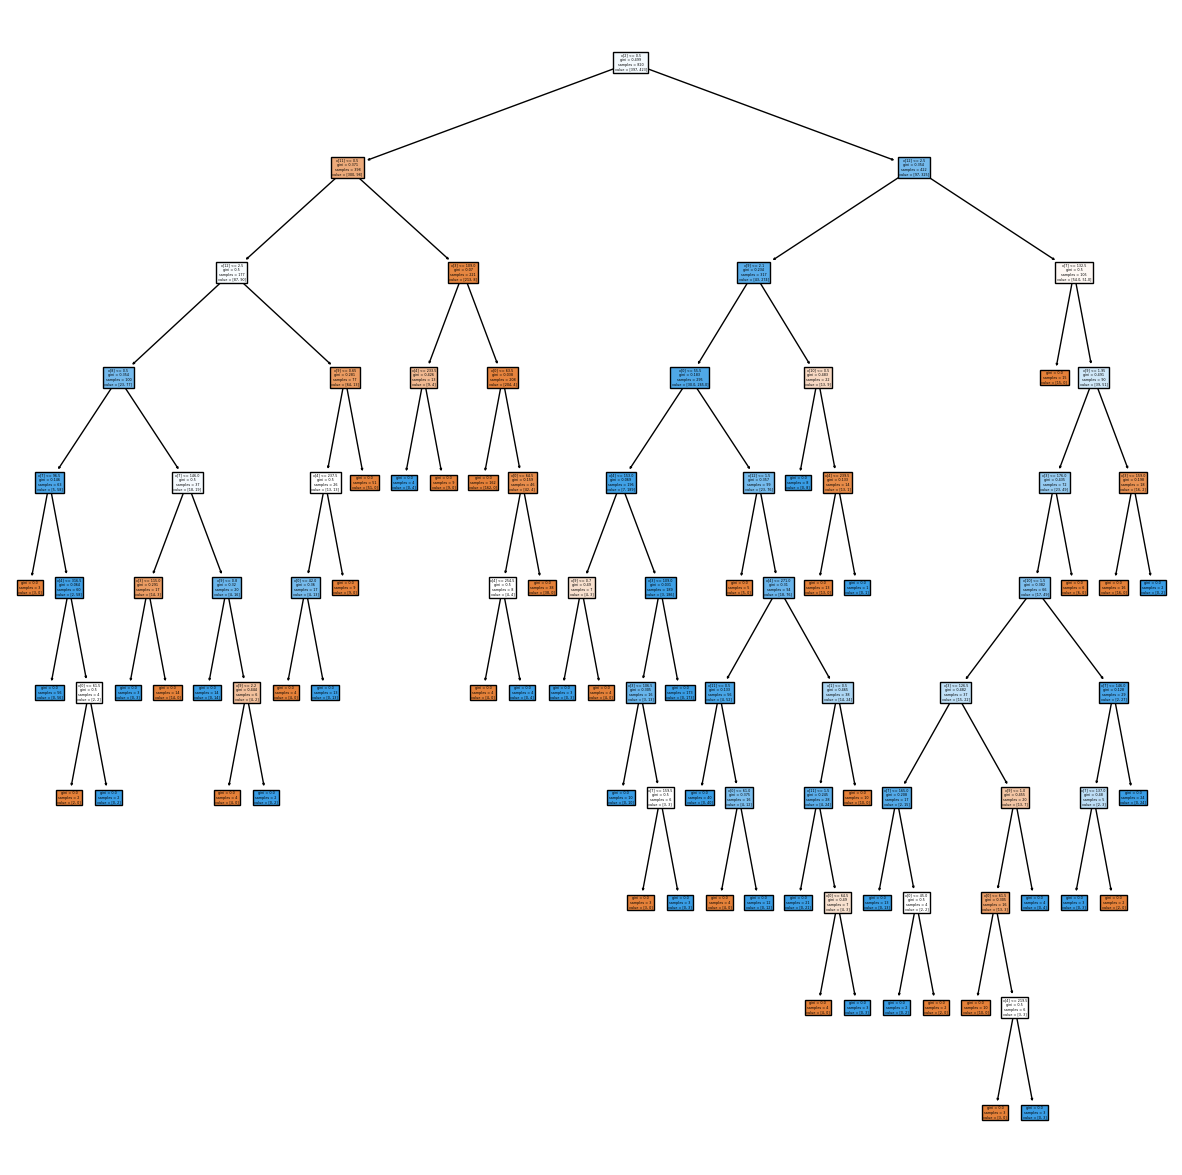

In [23]:
from sklearn import tree
plt.figure(figsize = (15, 15))
tree.plot_tree(dt_classifier, filled = True)

# 2. Analyze overfitting and control tree depth.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=2) #setting the maximum depth to 2
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(
    f"Classification Report:\n{classification_report(y_test, y_pred)}\n",
    f"Accuracy: {accuracy_score(y_test, y_pred)}\n",
    f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}"
)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

 Accuracy: 0.9853658536585366
 Confusion Matrix:
[[102   0]
 [  3 100]]


[Text(0.5, 0.8333333333333334, 'x[2] <= 0.5\ngini = 0.499\nsamples = 820\nvalue = [397, 423]'),
 Text(0.25, 0.5, 'x[11] <= 0.5\ngini = 0.371\nsamples = 398\nvalue = [300, 98]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 177\nvalue = [87, 90]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.07\nsamples = 221\nvalue = [213, 8]'),
 Text(0.75, 0.5, 'x[12] <= 2.5\ngini = 0.354\nsamples = 422\nvalue = [97, 325]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.234\nsamples = 317\nvalue = [43, 274]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 105\nvalue = [54.0, 51.0]')]

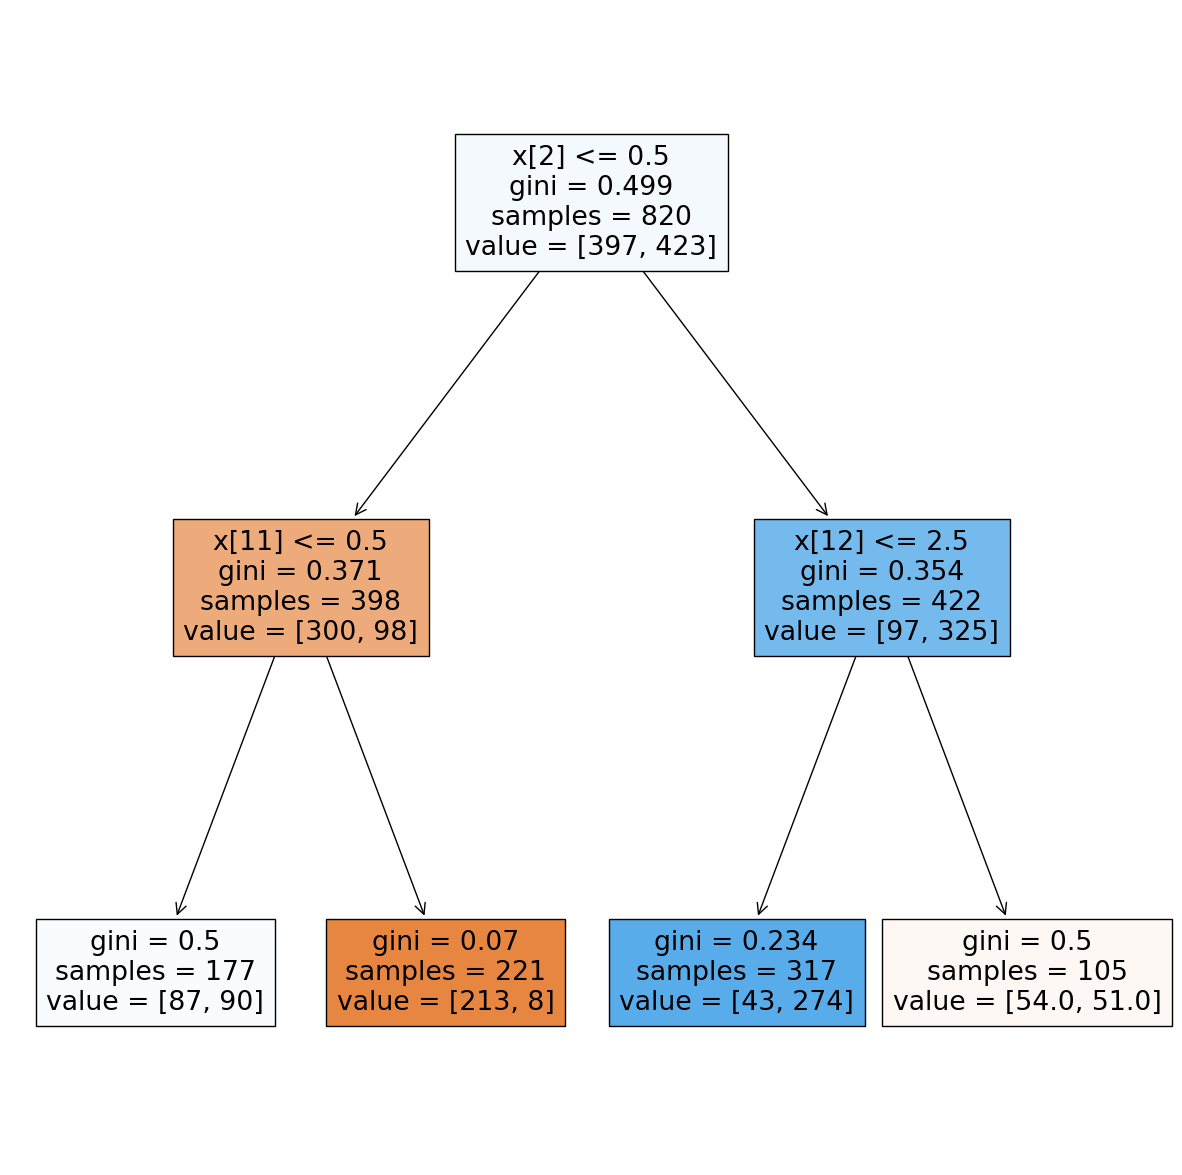

In [33]:
from sklearn import tree
plt.figure(figsize = (15, 15))
tree.plot_tree(dt_classifier, filled = True)

# 3. Train a Random Forest and compare accuracy.

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf

RandomForestClassifier()

In [11]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
y_pred = clf.predict(X_test)
y_pred 

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(
    f"Classification Report:\n{classification_report(y_test, y_pred)}\n",
    f"Accuracy: {accuracy_score(y_test, y_pred)}\n",
    f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}"
)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

 Accuracy: 0.9853658536585366
 Confusion Matrix:
[[102   0]
 [  3 100]]


# 4. Interpret feature importances.

[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.499\nsamples = 820\nvalue = [397, 423]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.371\nsamples = 398\nvalue = [300, 98]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.5\nsamples = 177\nvalue = [87, 90]'),
 Text(0.0625, 0.125, 'gini = 0.354\nsamples = 100\nvalue = [23, 77]'),
 Text(0.1875, 0.125, 'gini = 0.281\nsamples = 77\nvalue = [64, 13]'),
 Text(0.375, 0.375, 'x[3] <= 109.0\ngini = 0.07\nsamples = 221\nvalue = [213, 8]'),
 Text(0.3125, 0.125, 'gini = 0.426\nsamples = 13\nvalue = [9, 4]'),
 Text(0.4375, 0.125, 'gini = 0.038\nsamples = 208\nvalue = [204, 4]'),
 Text(0.75, 0.625, 'x[12] <= 2.5\ngini = 0.354\nsamples = 422\nvalue = [97, 325]'),
 Text(0.625, 0.375, 'x[9] <= 2.1\ngini = 0.234\nsamples = 317\nvalue = [43, 274]'),
 Text(0.5625, 0.125, 'gini = 0.183\nsamples = 295\nvalue = [30.0, 265.0]'),
 Text(0.6875, 0.125, 'gini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(0.875, 0.375, 'x[7] <= 132.5\ngini = 0.5\nsamples = 105\nvalue = [54

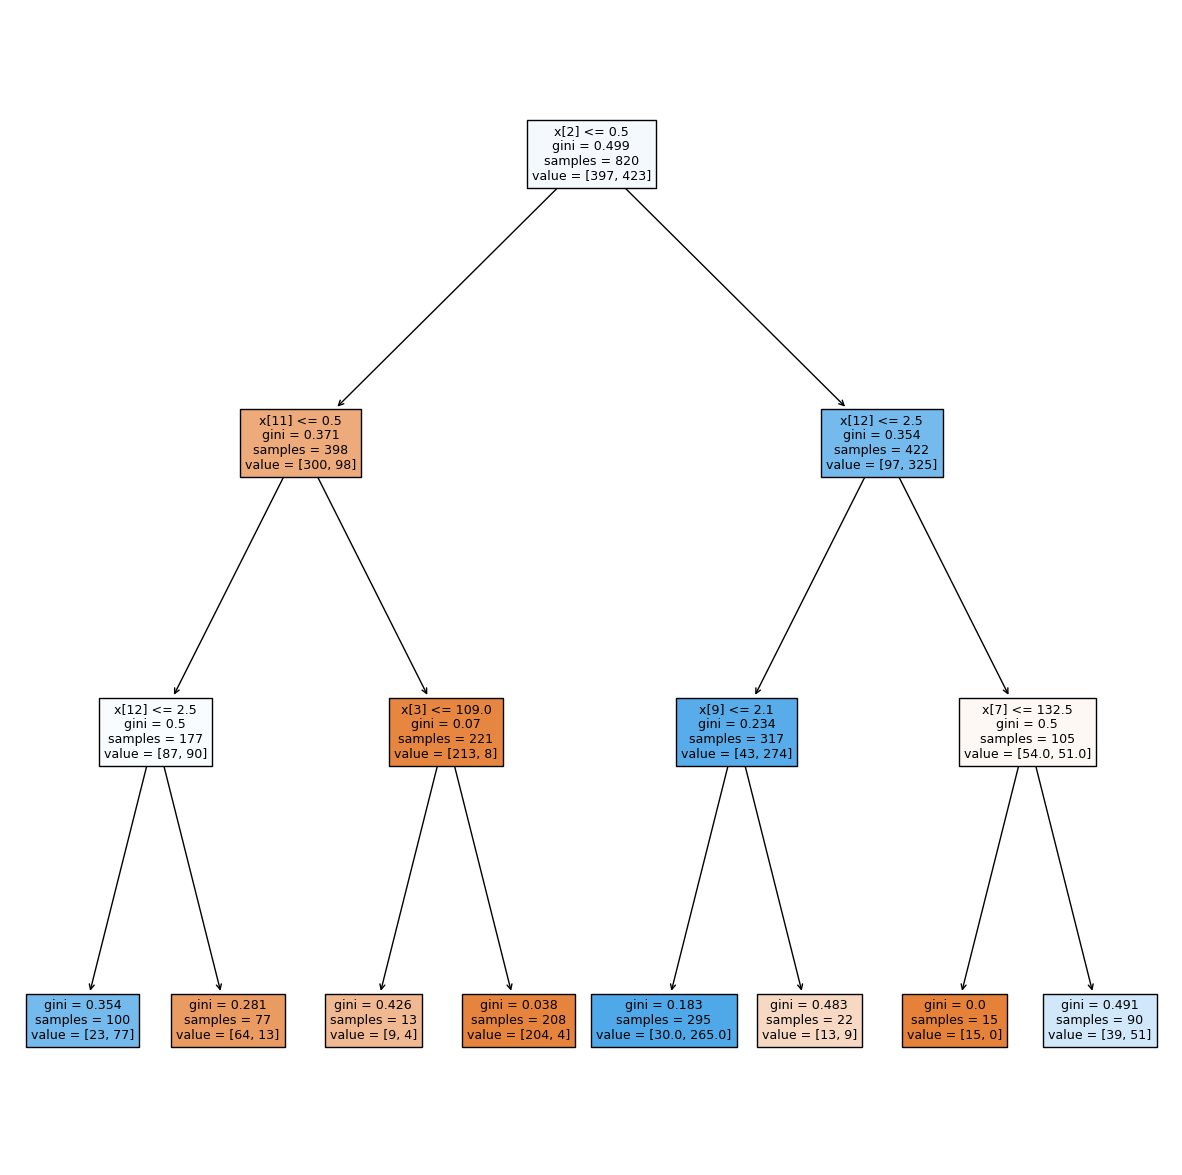

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt_classifier = DecisionTreeClassifier(max_depth=3) 
dt_classifier.fit(X_train, y_train)

plt.figure(figsize = (15, 15))
tree.plot_tree(dt_classifier, filled = True)

In [19]:
# Here it gives the gini impurity for each feature like for x[2] (i.e. cp column) have gini = 0.499 which shows it is more important

# 5. Evaluate using cross-validation.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
params = {
    "max_depth": [1, 2, 4, 5, 10, 20],
    "n_estimators": [50, 100, 152, 145, 190, 200, 500],
    "criterion": ["gini", "entropy"]
    }
grid = GridSearchCV(clf, param_grid = params, cv = 5, scoring = 'accuracy', verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.866 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.835 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.860 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.866 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.768 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.854 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.823 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.872 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.866 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.756 total time=   0.2s
[CV 1/5] END criterion=

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 5, 10, 20],
                         'n_estimators': [50, 100, 152, 145, 190, 200, 500]},
             scoring='accuracy', verbose=3)

In [22]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 145}

In [23]:
grid.best_score_

0.9829268292682928